<a href="https://colab.research.google.com/github/CoderArshia/C119/blob/main/C119_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
data = files.upload()

Saving C119.csv to C119.csv


In [3]:
import pandas as pd 
c_names = ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"]

df = pd.read_csv("C119.csv",names=c_names).iloc[1:]
print(df.head(10))


   pregnant glucose  bp skin insulin   bmi pedigree age label
1         6     148  72   35       0  33.6    0.627  50     1
2         1      85  66   29       0  26.6    0.351  31     0
3         8     183  64    0       0  23.3    0.672  32     1
4         1      89  66   23      94  28.1    0.167  21     0
5         0     137  40   35     168  43.1    2.288  33     1
6         5     116  74    0       0  25.6    0.201  30     0
7         3      78  50   32      88    31    0.248  26     1
8        10     115   0    0       0  35.3    0.134  29     0
9         2     197  70   45     543  30.5    0.158  53     1
10        8     125  96    0       0     0    0.232  54     1


In [8]:
features=["pregnant","insulin","bmi","age","glucose","bp","pedigree"]

X = df [features]
y = df.label



In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)
clf=DecisionTreeClassifier(max_depth=6)
clf=clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("accuracy",metrics.accuracy_score(y_test,y_pred))

accuracy 0.7489177489177489


In [24]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

data = StringIO()
export_graphviz(clf,out_file=data,filled=True,rounded=True,special_characters=True,feature_names=features,class_names=['0','1'])
print(data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.449<br/>samples = 537<br/>value = [354, 183]<br/>class = 0>, fillcolor="#f2c29f"] ;
1 [label=<bmi &le; 26.3<br/>gini = 0.329<br/>samples = 357<br/>value = [283, 74]<br/>class = 0>, fillcolor="#eca26d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 9.1<br/>gini = 0.06<br/>samples = 97<br/>value = [94, 3]<br/>class = 0>, fillcolor="#e6853f"] ;
1 -> 2 ;
3 [label=<age &le; 28.0<br/>gini = 0.444<br/>samples = 6<br/>value = [4, 2]<br/>class = 0>, fillcolor="#f2c09c"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [4, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 5 ;
6 [label=<pedigree &le; 0.669<br/>gini = 0.022<br/>samples = 91<br/>value = [90, 1]<br/>class = 0>, fillcolor="#e5

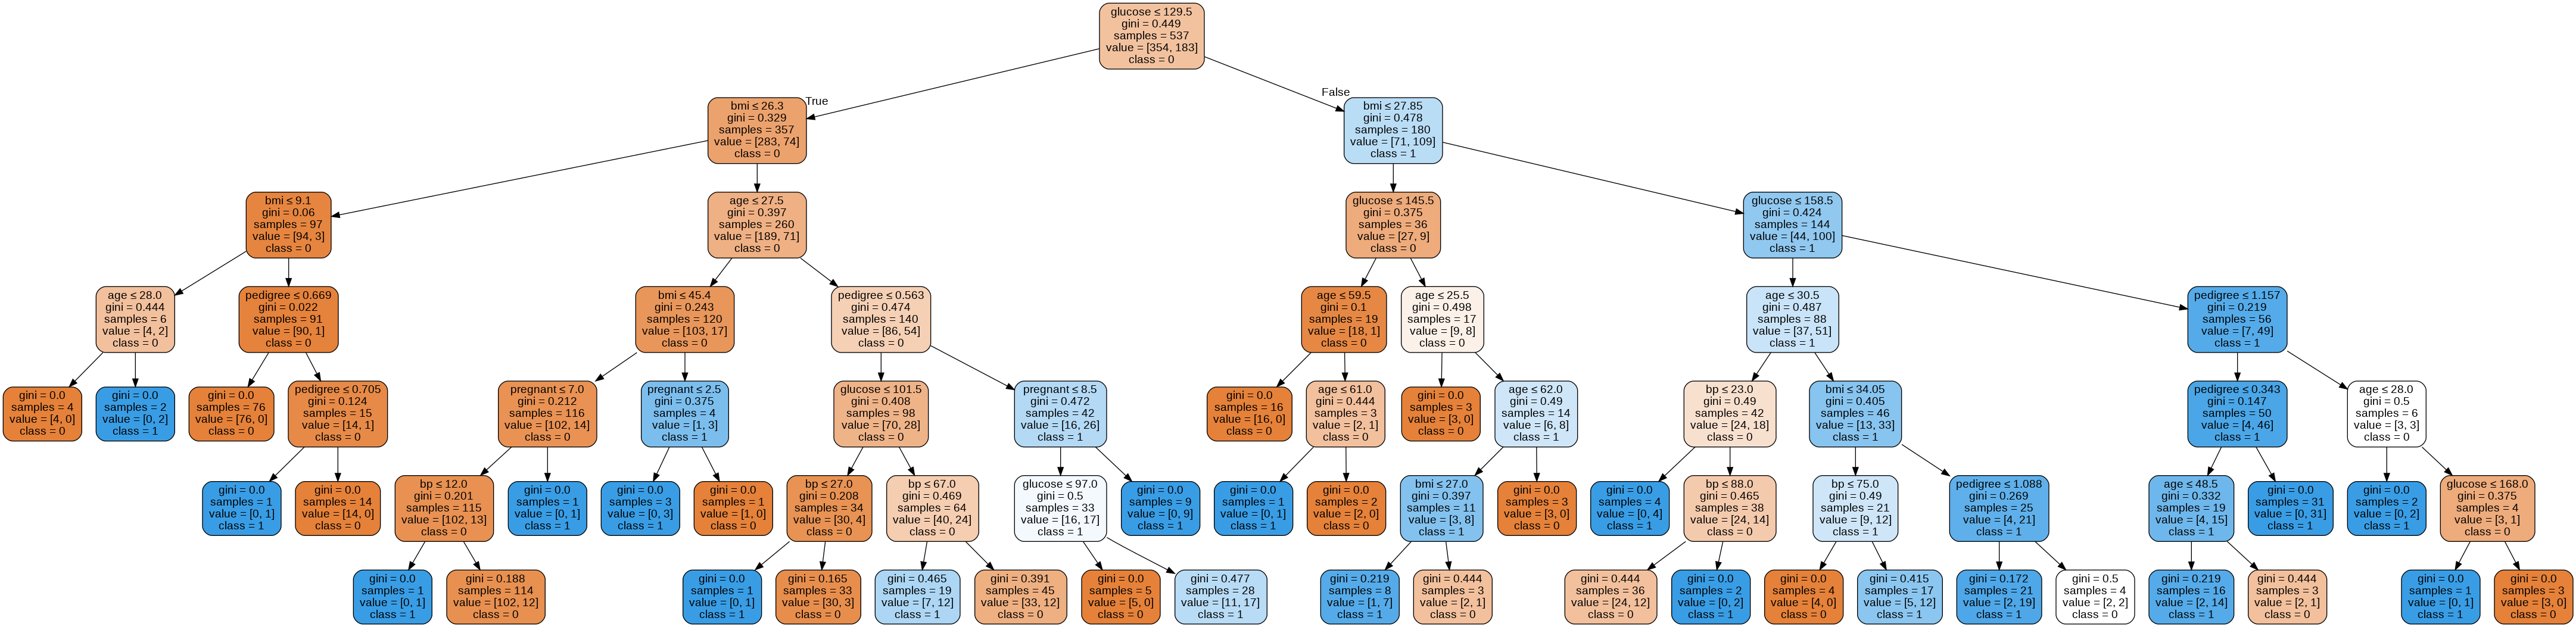

In [25]:
import pydotplus 
graph = pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png("diabities.png")
Image(graph.create_png())